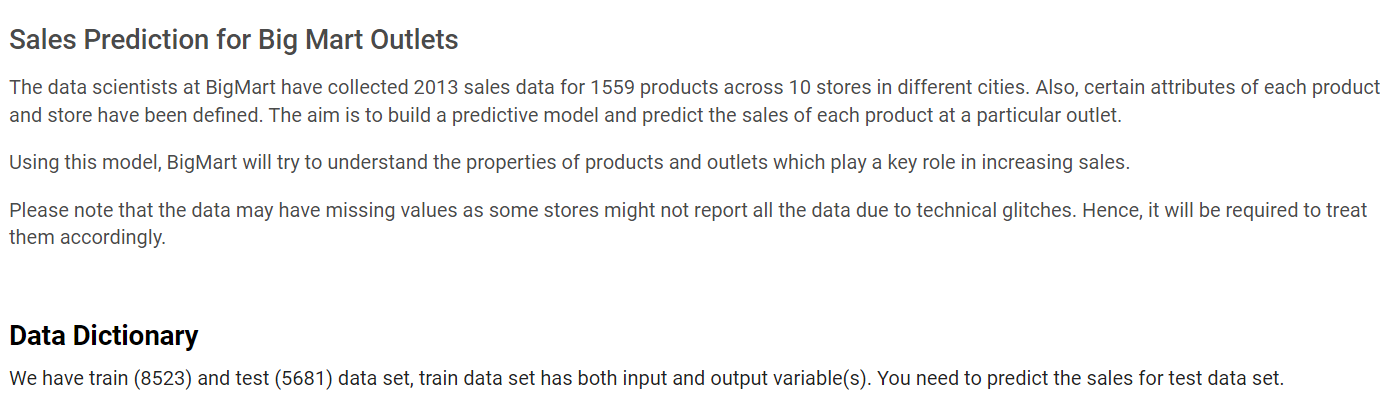

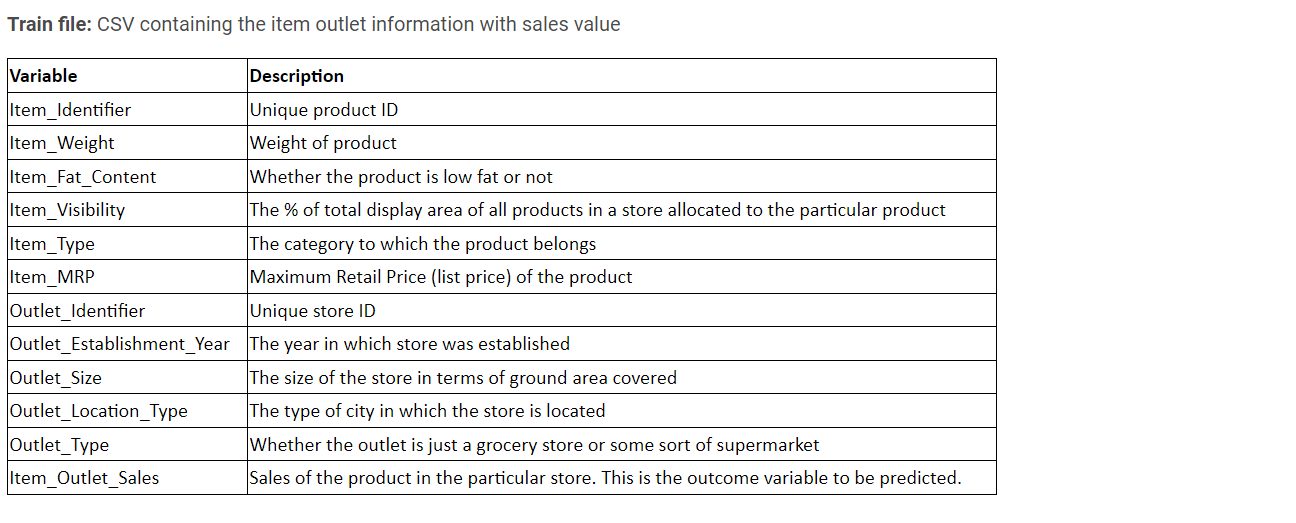

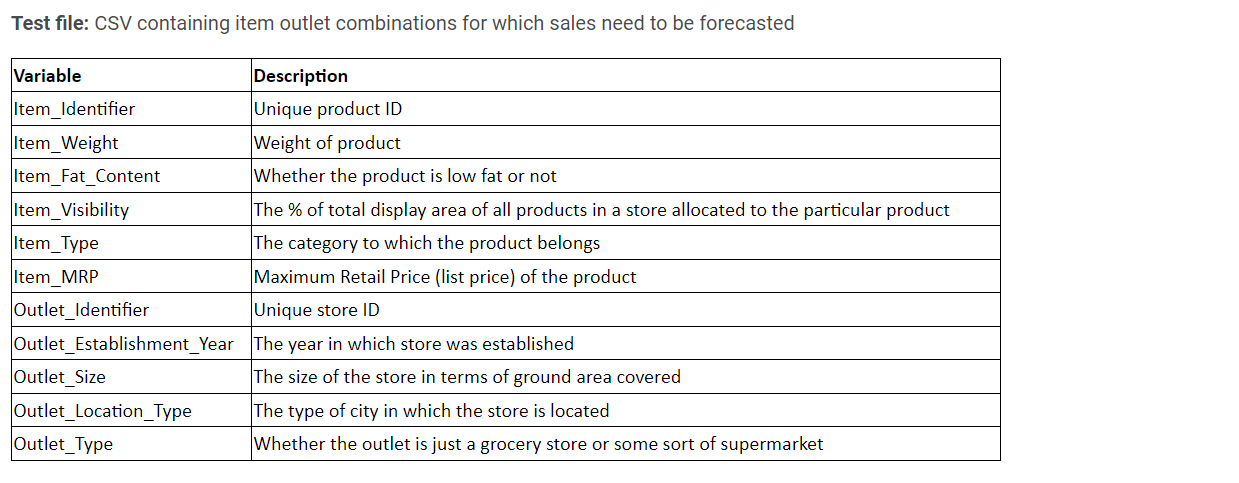

### Importing the necessary libraries

In [1]:
import pandas as pd      
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',20)

### Loading the Dataset

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
print(train.shape,test.shape)

(8523, 12) (5681, 11)


In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Checking the datatypes of each features

In [4]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

### Now will check for duplicated values

In [5]:
train[train.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Now will concat Train and Test data to perform Data Preprocessing

In [6]:
df=pd.concat([train,test],axis=0)

In [7]:
df.reset_index(drop=True,inplace=True)

In [8]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [9]:
df.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
14199,FDB58,10.5,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.6,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.0,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.3,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN
14203,FDU37,9.5,Regular,0.104720,Canned,79.7960,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN


### Now again we are checking for dupliates

In [10]:
df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


### Checking the shape of the dataframe

In [11]:
df.shape

(14204, 12)

### Will Check for Missing Values

In [12]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [13]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.3+ MB


In [15]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [16]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
for i in df.columns:
    print('Feature =',i,'\n')
    print(df[i].unique())
    print('No of unique values = ',df[i].nunique(),'\n')

Feature = Item_Identifier 

['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
No of unique values =  1559 

Feature = Item_Weight 

[ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1   

The data preprocessing steps to be done 

1. Item_Visibility should not be having 0 as its minimum 
2. In Item_Identifier we can take only starting 2 char and will use for prediction
3. In Item_Fat_Content we have only 2 levels but due to typoerror we have 5 levels
4. will convert Outlet_Establishment_Year to the age of the store establishment


## Will check for missing values

In [18]:
miss_val=df.isnull().sum()
miss_val[miss_val>0]

Item_Weight          2439
Outlet_Size          4016
Item_Outlet_Sales    5681
dtype: int64

Item_Outlet_Sales has no missing values where in test data we dont have the target variable so we are getting the null counts here so we should not treat the target variable [Item_Outlet_Sales]

In [19]:
df.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [20]:
df[(df.Item_Type == 'Dairy') | (df.Item_Type == 'Soft Drinks') & (df.Outlet_Size =='Medium')]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
11,FDA03,18.500,Regular,0.045464,Dairy,144.1102,OUT046,1997,Small,Tier 1,Supermarket Type1,2187.1530
19,FDU02,13.350,Low Fat,0.102492,Dairy,230.5352,OUT035,2004,Small,Tier 2,Supermarket Type1,2748.4224
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
14182,DRK37,5.000,Low Fat,0.044073,Soft Drinks,188.8530,OUT049,1999,Medium,Tier 1,Supermarket Type1,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14186,DRH36,16.200,Low Fat,0.033516,Soft Drinks,72.8696,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14187,DRC36,13.000,Regular,0.045168,Soft Drinks,173.4054,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN


In [21]:
df.Item_Identifier

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [22]:
df[df.Item_Identifier =='FDU15']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
1038,FDU15,13.65,Regular,0.026643,Meat,37.9532,OUT049,1999,Medium,Tier 1,Supermarket Type1,862.8768
2407,FDU15,13.65,Regular,0.044526,Meat,37.9532,OUT010,1998,NaN,Tier 3,Grocery Store,71.9064
3162,FDU15,13.65,Regular,0.026580,Meat,34.7532,OUT013,1987,High,Tier 3,Supermarket Type1,683.1108
4487,FDU15,13.65,Regular,0.000000,Meat,36.6532,OUT017,2007,NaN,Tier 2,Supermarket Type1,755.0172
7636,FDU15,13.65,Regular,0.000000,Meat,37.9532,OUT045,2002,NaN,Tier 2,Supermarket Type1,575.2512
7646,FDU15,13.65,Regular,0.026602,Meat,35.1532,OUT046,1997,Small,Tier 1,Supermarket Type1,790.9704
9670,FDU15,13.65,Regular,0.026710,Meat,37.8532,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
10020,FDU15,13.65,Regular,0.026597,Meat,36.3532,OUT035,2004,Small,Tier 2,Supermarket Type1,NaN
11321,FDU15,NaN,reg,0.046577,Meat,34.5532,OUT019,1985,Small,Tier 1,Grocery Store,NaN
11821,FDU15,NaN,Regular,0.026473,Meat,37.9532,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


will treat the missing values 

will fill the Item_Weight based on the mean by grouping with the Item_Identifier so that the treatement of missing values will be more efficient


### For example it works like this

In [23]:
df.Item_Identifier.value_counts()

Item_Identifier
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: count, Length: 1559, dtype: int64

In [24]:
df[df.Item_Identifier=='FDU15']['Item_Weight'].mean()

13.65

In [25]:
# For example will use FDU15 item how the weight are filled
df[df.Item_Identifier=='FDU15'][['Item_Identifier','Item_Weight']]

,Item_Identifier,Item_Weight
1038,FDU15,13.65
2407,FDU15,13.65
3162,FDU15,13.65
4487,FDU15,13.65
7636,FDU15,13.65
7646,FDU15,13.65
9670,FDU15,13.65
10020,FDU15,13.65
11321,FDU15,NaN
11821,FDU15,NaN


In [26]:
df[df.Item_Identifier == 'FDU15']['Item_Weight'].mean()

13.65

In [27]:
df[df.Item_Identifier == 'DRA12']['Item_Weight'].mean()

11.599999999999998

In [28]:
grouped_Item_Weight=df.pivot_table(values='Item_Weight',index='Item_Identifier')
grouped_Item_Weight

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115
...,...
NCZ30,6.590
NCZ41,19.850
NCZ42,10.500


In [29]:
grouped_Item_Weight.loc['FDU15',:]

Item_Weight    13.65
Name: FDU15, dtype: float64

In [30]:
# now will find the missing data in the Item_Weight column

miss_idx=df[df['Item_Weight'].isnull()].index
miss_idx

Index([    7,    18,    21,    23,    29,    36,    38,    39,    49,    59,
       ...
       14150, 14157, 14163, 14166, 14171, 14178, 14179, 14184, 14188, 14192],
      dtype='int64', length=2439)

In [31]:
for i,item in enumerate(df.Item_Identifier):
    print(item)

FDA15
DRC01
FDN15
FDX07
NCD19
FDP36
FDO10
FDP10
FDH17
FDU28
FDY07
FDA03
FDX32
FDS46
FDF32
FDP49
NCB42
FDP49
DRI11
FDU02
FDN22
FDW12
NCB30
FDC37
FDR28
NCD06
FDV10
DRJ59
FDE51
FDC14
FDV38
NCS17
FDP33
FDO23
DRH01
NCX29
FDV20
DRZ11
FDX10
FDB34
FDU02
FDK43
FDA46
FDC02
FDL50
FDM39
NCP05
FDV49
FDL12
FDS02
NCL17
FDM40
FDR13
FDA43
NCP18
FDK21
NCX54
DRK35
FDY21
FDI26
FDM20
FDV27
FDF09
FDY40
FDY45
FDC46
FDH19
FDZ03
DRH37
NCI17
FDJ58
FDL12
FDH35
FDG02
NCZ18
FDC29
FDQ10
FDN48
FDL04
FDV25
FDD58
FDN04
FDV45
NCL18
FDR12
FDG20
FDZ55
FDQ49
FDN33
FDN27
FDW20
DRG27
DRI25
FDA44
NCR17
FDU04
FDF41
FDB56
NCP18
FDB56
FDT28
FDD10
FDW57
DRB48
FDP09
FDH14
FDA47
FDG12
DRE60
DRK49
FDD03
FDS52
FDW39
FDX34
FDV11
FDD17
FDZ16
FDZ46
DRA12
FDY58
NCF19
DRJ13
FDB14
FDJ38
FDW11
FDL40
DRI49
FDV38
DRG23
NCP30
FDY25
NCH54
NCR53
FDS52
FDG02
NCO26
FDH35
FDB51
FDX44
NCN07
NCC31
NCX54
NCO55
NCC30
FDI16
FDP16
FDB11
NCB06
FDA45
NCO26
DRJ25
FDR28
FDI04
DRK12
FDX20
NCI18
FDB36
FDN13
DRD24
FDQ28
FDM22
FDR07
FDV25
DRF49
FDW51
DRL01
FDP2

In [32]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

Treating the missing values on Item Weight by grouping the item Identifier 

In [33]:
miss_idx = df[df.Item_Weight.isnull()].index
miss_idx

Index([    7,    18,    21,    23,    29,    36,    38,    39,    49,    59,
       ...
       14150, 14157, 14163, 14166, 14171, 14178, 14179, 14184, 14188, 14192],
      dtype='int64', length=2439)

In [34]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [35]:
grouped_Item_Weight.index

Index(['DRA12', 'DRA24', 'DRA59', 'DRB01', 'DRB13', 'DRB24', 'DRB25', 'DRB48',
       'DRC01', 'DRC12',
       ...
       'NCZ05', 'NCZ06', 'NCZ17', 'NCZ18', 'NCZ29', 'NCZ30', 'NCZ41', 'NCZ42',
       'NCZ53', 'NCZ54'],
      dtype='object', name='Item_Identifier', length=1559)

In [36]:
df[df.Item_Weight.isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,NaN,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,NaN,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,NaN,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,NaN,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [37]:
for i,item in enumerate(df.Item_Identifier):
    if i in miss_idx:
        if item in grouped_Item_Weight.index:
            df['Item_Weight'][i]=grouped_Item_Weight.loc[item]['Item_Weight']


In [38]:
df['Item_Weight'][7]

19.0

In [39]:
df.Item_Identifier

0        FDA15
1        DRC01
2        FDN15
3        FDX07
4        NCD19
         ...  
14199    FDB58
14200    FDD47
14201    NCO17
14202    FDJ26
14203    FDU37
Name: Item_Identifier, Length: 14204, dtype: object

In [40]:
df['Item_Weight'].isnull().sum()

0

In [41]:
df.iloc[miss_idx,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,19.000,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,8.260,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,8.315,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,15.500,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,14.500,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
14178,FDX32,15.100,Regular,0.099375,Fruits and Vegetables,143.6786,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14179,FDC39,7.405,Low Fat,0.158425,Dairy,207.8296,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14184,DRG37,16.200,Low Fat,0.000000,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN
14188,DRE03,19.600,Low Fat,0.024110,Dairy,46.0718,OUT027,1985,Medium,Tier 3,Supermarket Type3,NaN


In [42]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [43]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [44]:
# now will impute the missing values which are present in the Outlet_Size by taking the mode because its a categorical variable

grouped_Outlet_Size=df.pivot_table(values='Outlet_Size',index='Outlet_Type',aggfunc=(lambda x:x.mode()))
grouped_Outlet_Size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [45]:
miss_idx_Outlet_Size=df[df['Outlet_Size'].isnull()].index
miss_idx_Outlet_Size

Index([    3,     8,     9,    25,    28,    30,    33,    45,    46,    47,
       ...
       14170, 14172, 14173, 14175, 14185, 14191, 14193, 14201, 14202, 14203],
      dtype='int64', length=4016)

In [46]:
for i,item in enumerate(df.Outlet_Type):
    if i in miss_idx_Outlet_Size:
        if item in grouped_Outlet_Size.index:
            df['Outlet_Size'][i]=grouped_Outlet_Size.loc[item]['Outlet_Size']

In [47]:
df['Outlet_Size'].isnull().sum()

0

In [48]:
df1=df.copy(deep=True)

In [49]:
df=df.reset_index(drop=True)

In [50]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: >

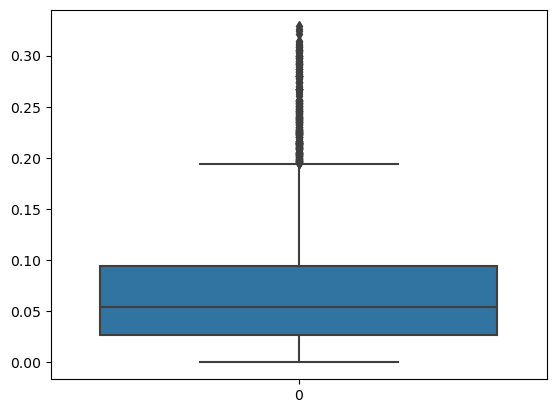

In [51]:
sns.boxplot(df.Item_Visibility)

### Now will modify item visibility because we cannot have 0 in item visibility

In [52]:
# Now we are going to impute the 0 values in Item_Visibility with the mean of it 

mean_Item_Visibility=round(df['Item_Visibility'].mean(),6)
mean_Item_Visibility

0.065953

In [53]:
idx=df[df['Item_Visibility']==0].index
idx

Index([    3,     4,     5,    10,    32,    33,    46,    60,    72,    79,
       ...
       14120, 14126, 14134, 14137, 14158, 14166, 14171, 14177, 14184, 14202],
      dtype='int64', length=879)

In [54]:
# Now will try to replace with mean of item_visibility where ever you can find item_visibility = 0
df['Item_Visibility'] = df.Item_Visibility.apply(lambda x : mean_Item_Visibility if x == 0 else x)

In [55]:
df[df['Item_Visibility']==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [56]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Will work on the typo error in the Item_Fat_Content


In [57]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: count, dtype: int64

In [58]:
# Now will replace the data accourdingly

df['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

In [59]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

### Now will take only 2 char from the Item_Identifier


In [60]:
df['New_Item_Identifier']=df['Item_Identifier'].apply(lambda x : x[0:2])

In [61]:
df['New_Item_Identifier'].value_counts()

New_Item_Identifier
FD    10201
NC     2686
DR     1317
Name: count, dtype: int64

In [62]:
df.Item_Fat_Content.value_counts()

Item_Fat_Content
Low Fat    9185
Regular    5019
Name: count, dtype: int64

In [63]:
# Now will replace the data where ever we having the NC in the New_Item_Identifier the Item_Fat_Content should be others

df.loc[df['New_Item_Identifier']=='NC','Item_Fat_Content']='others'

In [64]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    6499
Regular    5019
others     2686
Name: count, dtype: int64

In [65]:
# We have collected the data from year 2013 so we are subtracting outlet Estiablishment year with 2013
df['age_of_store']=2013-df.Outlet_Establishment_Year

In [66]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,FDX07,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,FD,15
4,NCD19,8.93,others,0.065953,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,26


In [67]:
df2=df.copy(deep=True)

### Now will drop those features where we have performed data preprocessing technique and now those columns are not useful for prediction

In [68]:
df.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year'],axis=1,inplace=True)

In [69]:
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.30,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.92,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.50,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.20,Regular,0.065953,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.93,others,0.065953,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26


-----------------------------------------------------------------------------------------------------------------------

In [70]:
df1= df[df.Item_Outlet_Sales.isnull()]
df1

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
8523,20.750,Low Fat,0.007565,Snack Foods,107.8622,Medium,Tier 1,Supermarket Type1,NaN,FD,14
8524,8.300,Regular,0.038428,Dairy,87.3198,Small,Tier 2,Supermarket Type1,NaN,FD,6
8525,14.600,others,0.099575,Others,241.7538,Small,Tier 3,Grocery Store,NaN,NC,15
8526,7.315,Low Fat,0.015388,Snack Foods,155.0340,Small,Tier 2,Supermarket Type1,NaN,FD,6
8527,13.600,Regular,0.118599,Dairy,234.2300,Medium,Tier 3,Supermarket Type3,NaN,FD,28
...,...,...,...,...,...,...,...,...,...,...,...
14199,10.500,Regular,0.013496,Snack Foods,141.3154,Small,Tier 1,Supermarket Type1,NaN,FD,16
14200,7.600,Regular,0.142991,Starchy Foods,169.1448,Medium,Tier 3,Supermarket Type2,NaN,FD,4
14201,10.000,others,0.073529,Health and Hygiene,118.7440,Small,Tier 2,Supermarket Type1,NaN,NC,11
14202,15.300,Regular,0.065953,Canned,214.6218,Small,Tier 2,Supermarket Type1,NaN,FD,6


In [71]:
df2= df[~(df.Item_Outlet_Sales.isnull())]
df2

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier,age_of_store
0,9.300,Low Fat,0.016047,Dairy,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,14
1,5.920,Regular,0.019278,Soft Drinks,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,4
2,17.500,Low Fat,0.016760,Meat,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,14
3,19.200,Regular,0.065953,Fruits and Vegetables,182.0950,Small,Tier 3,Grocery Store,732.3800,FD,15
4,8.930,others,0.065953,Household,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,26
...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,Low Fat,0.056783,Snack Foods,214.5218,High,Tier 3,Supermarket Type1,2778.3834,FD,26
8519,8.380,Regular,0.046982,Baking Goods,108.1570,Small,Tier 2,Supermarket Type1,549.2850,FD,11
8520,10.600,others,0.035186,Health and Hygiene,85.1224,Small,Tier 2,Supermarket Type1,1193.1136,NC,9
8521,7.210,Regular,0.145221,Snack Foods,103.1332,Medium,Tier 3,Supermarket Type2,1845.5976,FD,4


In [72]:
5681 + 8523

14204

# Big_Mart_Sales_Prediction

In [89]:
df2[['Item_Weight','Item_MRP','Item_Visibility','age_of_store','Item_Outlet_Sales']].corr()

,Item_Weight,Item_MRP,Item_Visibility,age_of_store,Item_Outlet_Sales
Item_Weight,1.000000,0.026172,-0.017943,0.012823,0.013261
Item_MRP,0.026172,1.000000,-0.005248,-0.005020,0.567574
Item_Visibility,-0.017943,-0.005248,1.000000,0.078356,-0.134141
age_of_store,0.012823,-0.005020,0.078356,1.000000,0.049135
Item_Outlet_Sales,0.013261,0.567574,-0.134141,0.049135,1.000000


<Axes: >

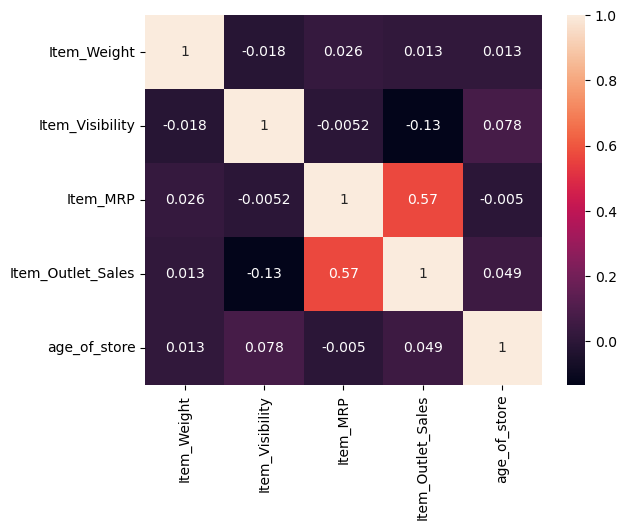

In [90]:
sns.heatmap(df2[df2.describe().columns.to_list()].corr(),annot = True)

### Observation: 
When Correlation is between +0.4 and +0.6 we call it as moderate positive association.   
So we can tell that 'Item_MRP' and 'Item_Outlet_Sales' have moderate positive association, which is more than any other independent variables compared with target variable 'Item_Outlet_Sales'. 

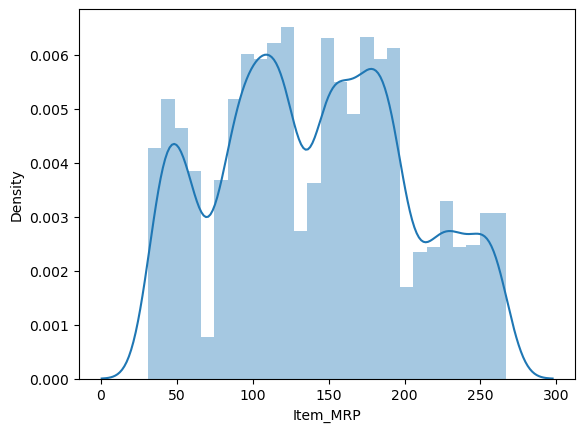

In [91]:
sns.distplot(df2.Item_MRP)
plt.show()

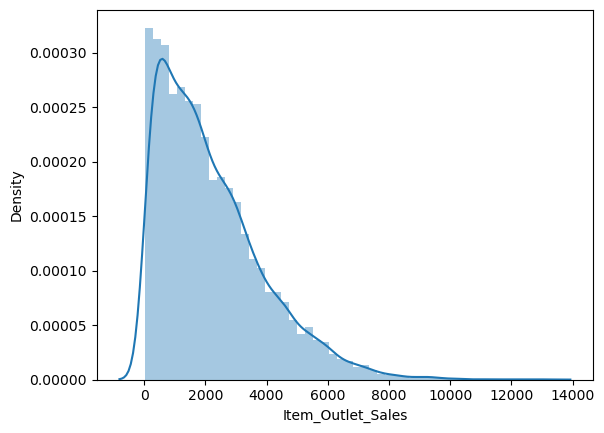

In [92]:
sns.distplot(df2.Item_Outlet_Sales)
plt.show()

In [93]:
df2.Item_Outlet_Sales.mean()

2181.288913575032

### Observation:  
 The Target variable Item_Outlet_Sales has average sales equal to 2181.29
    

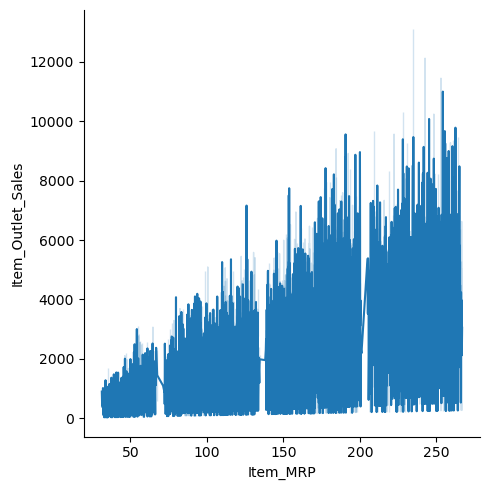

In [94]:
sns.relplot(x='Item_MRP',y='Item_Outlet_Sales',kind = 'line',data = df)

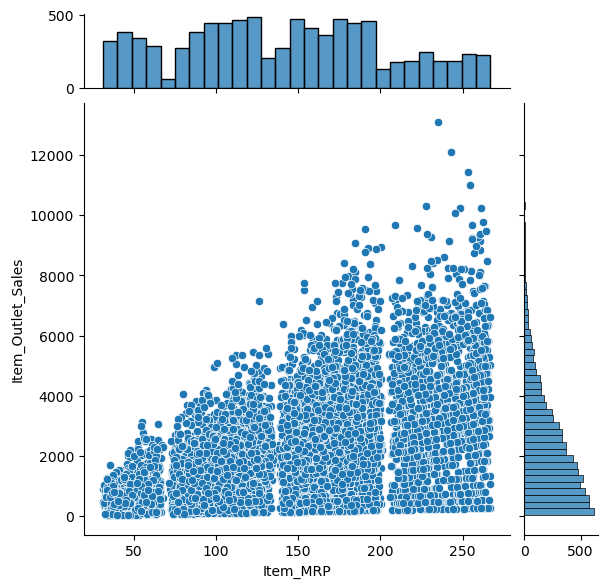

In [95]:
sns.jointplot(x='Item_MRP',y='Item_Outlet_Sales',data=df2,marginal_ticks =True)

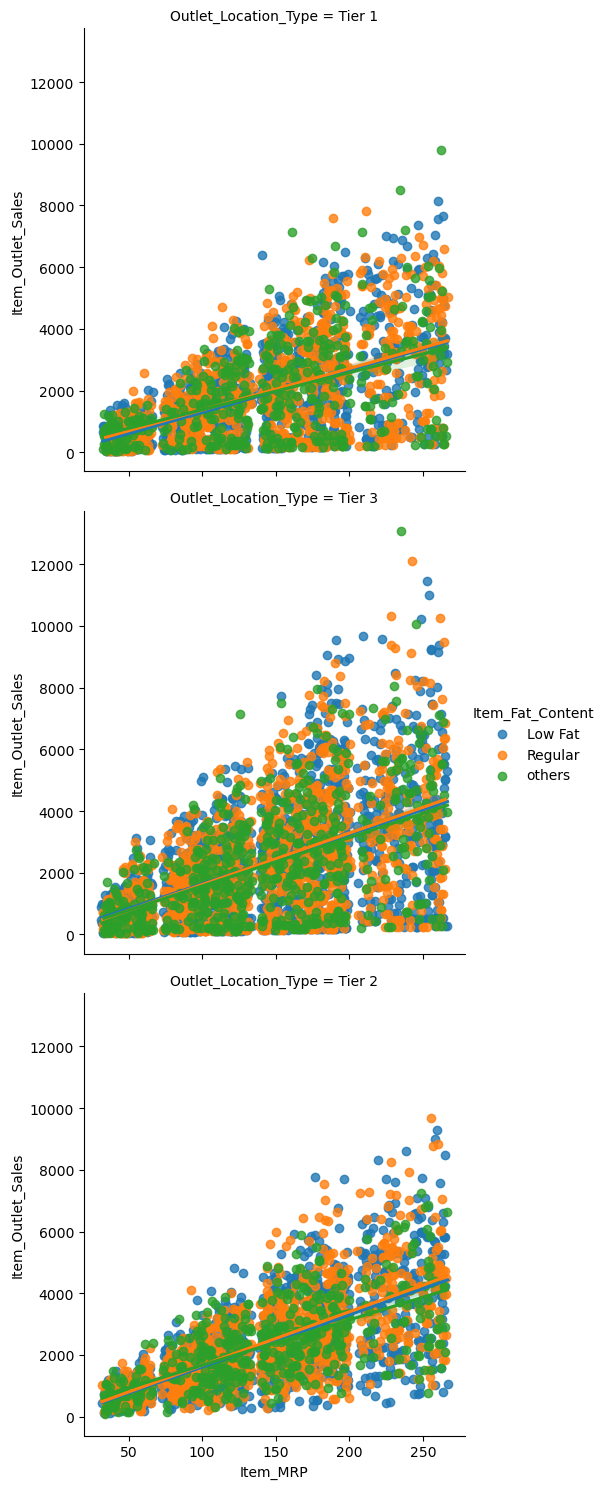

In [96]:
sns.lmplot(x='Item_MRP',y='Item_Outlet_Sales',hue='Item_Fat_Content',row='Outlet_Location_Type',data=df2)  

### Observation:  
 From the above graphs we can tell that Item_MRP and Item_Outlet_Sales are positively correlated.

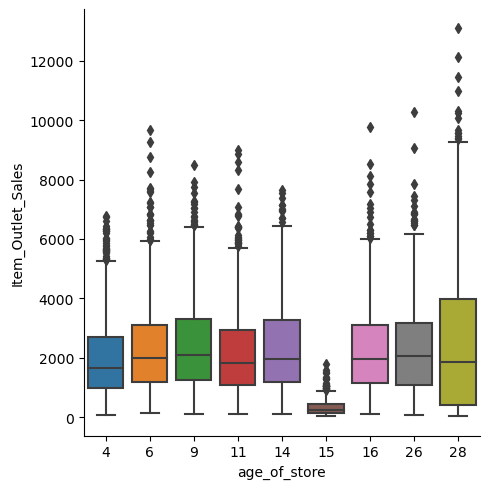

In [97]:
sns.catplot(x='age_of_store',y='Item_Outlet_Sales',kind='box',data=df2) 

In [98]:
df2.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,age_of_store
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.873623,0.070202,140.992782,2181.288914,15.168133
std,4.645893,0.048742,62.275067,1706.499616,8.371760
min,4.555000,0.003575,31.290000,33.290000,4.000000
25%,8.785000,0.033085,93.826500,834.247400,9.000000
50%,12.600000,0.062517,143.012800,1794.331000,14.000000
75%,16.850000,0.094585,185.643700,3101.296400,26.000000
max,21.350000,0.328391,266.888400,13086.964800,28.000000


### Observation:  
  From the above graph, we can see mean deviating from 50%(percentile) with 1.168133 difference, this is caused due to presence of outlayers.  
  If we try removing the outlayers we will have data even more cleaned.

In [99]:
df2.groupby('age_of_store').max()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Item_Identifier
age_of_store,,,,,,,,,,
4,21.35,others,0.188323,Starchy Foods,265.1884,Medium,Tier 3,Supermarket Type2,6768.5228,NC
6,21.25,others,0.188620,Starchy Foods,266.8884,Small,Tier 2,Supermarket Type1,9664.7528,NC
9,21.35,others,0.187523,Starchy Foods,266.5884,Small,Tier 2,Supermarket Type1,8479.6288,NC
11,21.25,others,0.187939,Starchy Foods,265.7884,Small,Tier 2,Supermarket Type1,8994.9580,NC
14,21.25,others,0.187850,Starchy Foods,266.2884,Medium,Tier 1,Supermarket Type1,7646.0472,NC
15,21.35,others,0.311090,Starchy Foods,266.6884,Small,Tier 3,Grocery Store,1775.6886,NC
16,21.35,others,0.187559,Starchy Foods,266.8884,Small,Tier 1,Supermarket Type1,9779.9362,NC
26,21.35,others,0.185705,Starchy Foods,266.6884,High,Tier 3,Supermarket Type1,10256.6490,NC
28,21.35,others,0.328391,Starchy Foods,266.5884,Small,Tier 3,Supermarket Type3,13086.9648,NC


In [100]:
df2.groupby('age_of_store')['Item_Outlet_Sales'].mean()

age_of_store
4     1995.498739
6     2340.675263
9     2438.841866
11    2192.384798
14    2348.354635
15     339.351662
16    2277.844267
26    2298.995256
28    2483.677474
Name: Item_Outlet_Sales, dtype: float64

<Axes: xlabel='age_of_store', ylabel='count'>

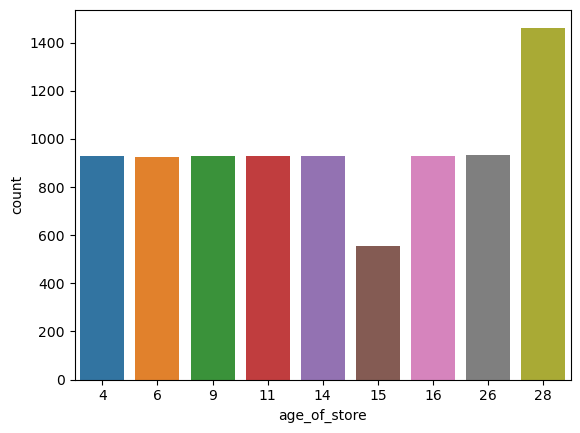

In [101]:
sns.countplot(x='age_of_store',data=df2)

### Observation:  
  Here the graph says that age_of_store equal to 28 has occured more number of times in the data, meaning most number of items brought is from the store which has age 28.

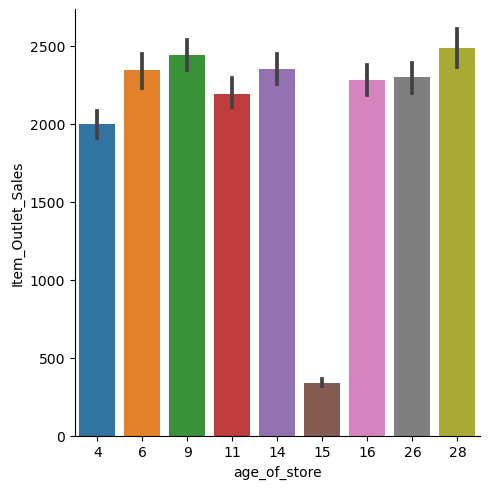

In [102]:
sns.catplot(x='age_of_store',y='Item_Outlet_Sales',kind='bar',data=df2) 

In [103]:
df2.groupby('age_of_store')['Item_Outlet_Sales'].mean()

age_of_store
4     1995.498739
6     2340.675263
9     2438.841866
11    2192.384798
14    2348.354635
15     339.351662
16    2277.844267
26    2298.995256
28    2483.677474
Name: Item_Outlet_Sales, dtype: float64

### Observation:  
 We can tell from above graph that for age_of_store equal to 28, 'Item_Outlet_Sales' is maximum.

### Key Findings:  
    1. More information from Items_MRP gives you Item_Outlet_Sales compared to other independent variables.
    2. Independent variable age_of_store with value 28 gives you the maximum Item_Outlet_Sales.